In [11]:
import numpy as np
from utils import * 
from constant import *
from datetime import date
import matplotlib.pyplot as plt
from progressbar import ProgressBar

# We can use ProgressBar as follow : 
# pbar = ProgressBar()
# for vent_epoch in pbar(vent_range)

In [2]:
def init_matrix():
    Res = np.zeros((N_VARIABLE,T_MAX))
    Res[0,0] = S_0
    return Res
Res = init_matrix()

In [13]:
def euler_one_step(S,I_moins,I_plus,R_moins,R_plus_I,H,U,R_plus_H,D,D_R,i,cst):
    
    S_1 = np.max(S-cst['tau'][i]*S*I_moins*deltaT,0)
    I_moins_1 = I_moins + (cst['tau'][i]*S*I_moins-cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_moins)*deltaT
    I_plus_1 = I_plus +(cst['lambda_1']*I_moins-(cst['gamma_IR']+cst['gamma_IH']+cst['gamma_IU'])*I_plus)*deltaT
    R_moins_1 = R_moins +(cst['gamma_IR']*I_moins-cst['lambda_2']*R_moins)*deltaT
    R_plus_I_1 = R_plus_I + (cst['gamma_IR']*I_plus+cst['lambda_2']*R_moins)*deltaT
    H_1 = H + (cst['gamma_IH']*(I_moins + I_plus)-(cst['gamma_HR']+cst['gamma_HD']+cst['gamma_HU'])*H)*deltaT
    U_1 = U + (cst['gamma_IU']*(I_moins + I_plus)+cst['gamma_HU']*H-(cst['gamma_UR'] + cst['gamma_UD'])*U)*deltaT
    R_plus_H_1 = R_plus_H+ (cst['gamma_HR']*H+cst['gamma_UR']*U)*deltaT
    D_1 = D + (cst['gamma_UD']*U+cst['gamma_HD']*H)*deltaT  
    D_R_1 = D_R +((cst['lambda_1']+cst['gamma_IH']+cst['gamma_IU'])*I_moins-D_R)*deltaT
    
    
    return(S_1,I_moins_1,I_plus_1,R_moins_1,R_plus_I_1,H_1,U_1,R_plus_H_1,D_1,D_R_1)


def resolution_system(set_size,deltaT,cst):
    Res = np.zeros((N_VARIABLE,set_size))
    
    Res[0,0] = cst['S_0'] - cst['I_moins_0']
    Res[1,0] = cst['I_moins_0']
    
    for i in range(1,set_size):
        Res[:,i] = np.array(euler_one_step(Res[0,i-1],Res[1,i-1],Res[2,i-1],Res[3,i-1],Res[4,i-1],Res[5,i-1],Res[6,i-1],Res[7,i-1],Res[8,i-1],Res[9,i-1],i-1,cst))
    return(Res)


In [15]:
def Monte_Carlo(M):
    pbar = ProgressBar()
    peak_value, peak_day = [],[]
    for i in pbar(range(M)):
        cst = init_constant()
        results = resolution_system(set_size,deltaT,cst)
        peak_value.append(np.max(list(results[6,:])))
        peak_day.append(int(((list(results[6,:])).index(peak_value[-1])*deltaT)))
    return peak_value,peak_day
M = 1000
peak_value,peak_day = Monte_Carlo(M)

100% |########################################################################|


(array([755.,  29.,  15.,   5.,   5.,   4.,   3.,   5.,   6.,   4.,   2.,
          4.,   4.,   5.,   3.,   4.,   5.,   1.,   2.,   0.,   1.,   2.,
          1.,   5.,   2.,   1.,   6.,   4.,   3.,   1.,   0.,   3.,   2.,
          3.,   1.,   2.,   2.,   1.,   1.,   1.,   1.,   1.,   2.,   2.,
          2.,   3.,   3.,   2.,   0.,   1.,   0.,   2.,   6.,   1.,   1.,
          1.,   1.,   2.,   4.,   1.,   1.,   2.,   4.,   2.,   2.,   1.,
          6.,   4.,   5.,   2.,   3.,   2.,   3.,   1.,   0.,   3.,   1.,
          1.,   1.,   1.,   2.,   2.,   1.,   4.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([2.56421784e-01, 1.63131584e+05, 3.26262911e+05, 4.89394238e+05,
        6.52525565e+05, 8.15656893e+05, 9.78788220e+05, 1.14191955e+06,
        1.30505087e+06, 1.46818220e+06, 1.63131353e+06, 1.79444486e+06,
        1.95757618e+06, 2.12070751e+06, 2.28383884e+06, 2.44697017e+06,
        2.61010149e+06, 2.7732

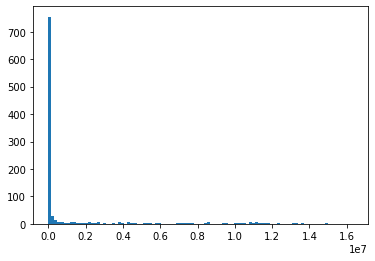

In [24]:
plt.hist(peak_value,bins = 100)


(array([ 7., 33., 69.,  0., 55., 47., 44.,  0., 28., 18., 30.,  0., 31.,
        24., 20.,  0., 28., 17., 16.,  0., 17., 15., 13.,  0., 14., 20.,
        17.,  0., 12., 23., 25.,  0., 26., 18., 19.,  0., 20., 16., 22.,
         0., 21., 17., 19.,  0., 13.,  6., 17.,  0.,  9., 12., 11.,  0.,
        14.,  8., 12.,  0.,  7., 14.,  7.,  0.,  5.,  8.,  2.,  0.,  6.,
         3.,  7.,  0.,  7.,  1.,  4.,  0.,  5.,  2.,  3.,  0.,  1.,  4.,
         2.,  0.,  0.,  1.,  2.,  0.,  0.,  3.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 5.  ,  5.75,  6.5 ,  7.25,  8.  ,  8.75,  9.5 , 10.25, 11.  ,
        11.75, 12.5 , 13.25, 14.  , 14.75, 15.5 , 16.25, 17.  , 17.75,
        18.5 , 19.25, 20.  , 20.75, 21.5 , 22.25, 23.  , 23.75, 24.5 ,
        25.25, 26.  , 26.75, 27.5 , 28.25, 29.  , 29.75, 30.5 , 31.25,
        32.  , 32.75, 33.5 , 34.25, 35.  , 35.75, 36.5 , 37.25, 38.  ,
        38.75, 39.5 , 40.25, 41.  , 41.75, 42.5 , 43.25, 44.  , 44.75,
        

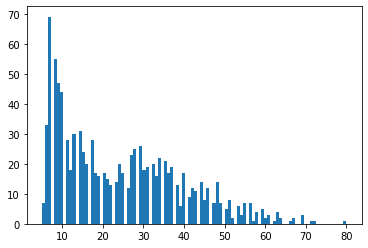

In [23]:
plt.hist(peak_day,bins = 100)